**<font face = "Courier New" size = 5 color = #FDFF8F> ANÁLISIS DE LOS DATOS  </font>**

<font face = "Courier New" size = 4 > A continuación responderemos a las preguntas planteadas.
</font>

In [1]:
import pandas as pd
import sqlite3

In [2]:
# NOS CONECTAMOS A LA BASE DE DATOS PARA OBTENER LAS TABLAS QUE CONSULTAREMOS

connection = sqlite3.connect('database_twitter.db')
cursor = connection.cursor()

def sql_query(query,cursor):

    # Ejecuta la query
    cursor.execute(query)

    # Almacena los datos de la query 
    ans = cursor.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in cursor.description]

    return pd.DataFrame(ans,columns=names)


query_1 = '''SELECT * FROM users'''
query_2 = '''SELECT * FROM tweets'''

users = sql_query(query_1, cursor)
tweets = sql_query(query_2, cursor)

<font face = "Courier New" size = 4 > 1.¿Cuál es el tweet con mayor repercusión social? </font>

In [3]:
tweets

,id,username,date,tweet,replies_count,retweets_count,likes_count,hashtags,retweet
0,1577334577701453827,paumugarra,2022-10-04,Recordaros que la semana que viene tenemos la ...,0,2,12,['cps'],0
1,1576951801047179264,thebridge_tech,2022-10-03,¡Vuelven las #becas Digital Talent Pipeline! ...,0,1,1,"['becas', 'bootcamp', 'dtp', 'becasformacion',...",0
2,1576902991507922944,formacion_fuc3,2022-10-03,El desarrollador web es uno de los perfiles má...,0,3,3,['bootcamp'],0
3,1576856703349374976,jose_sola_,2022-10-03,@jorgegrev @TheBridge_Tech Enhorabuena crack!,0,0,1,[],0
4,1575217357105946624,bertinha84,2022-09-28,Hoy por fin ve la luz mi primer Case Study púb...,0,3,4,[],0
...,...,...,...,...,...,...,...,...,...
177,1536267654717132801,sergio_berbis,2022-06-13,@HeavyMental_es @PesetJairo @TheBridge_Tech @G...,0,0,2,[],0
178,1536045384275050496,pocerillo,2022-06-12,@HeavyMental_es @TheBridge_Tech @GuillermoDeHa...,0,0,3,[],0
179,1535929691051368448,heavymental_es,2022-06-12,@lahabitacioncr1 @Sergio_Berbis @kawenzotz @Ni...,0,0,2,[],0
180,1535885427307069440,recuenco,2022-06-12,@PedroAeriaa @HeavyMental_es @TheBridge_Tech @...,1,0,2,[],0


In [4]:
# CONSIDERAMOS QUE LA REPERCUSIÓN ES LA SUMA TOTAL DE LAS INTERACCIONES CON EL TWEET, POR LO QUE CREAMOS UNA NUEVA COLUMNA QUE SUME LAS
# 3 MÉTRICAS DE LAS QUE DISPONEMOS Y LA ORDENAMOS DE MAYOR A MENOR.

pd.set_option('display.max_colwidth', 500)

tweets['repercusion_tot']=tweets['replies_count'] + tweets['retweets_count'] + tweets['likes_count']

# PARA ESTE APARTADO DEL ESTUDIO, ELIMINAMOS LOS TWEETS DEL USUARIO thebridge_tech.
tweets_sin_thebridge = tweets.drop(tweets[tweets['username']=='thebridge_tech'].index)

tweets_sin_thebridge[['repercusion_tot', 'username','tweet']].sort_values(by='repercusion_tot', ascending=False)

,repercusion_tot,username,tweet
97,27,heavymental_es,El sentido de la vida ya no es 42 -- Light Mental edición especial @TheBridge_Tech https://t.co/z7hOVln8Bp
8,27,paumugarra,Y seguimos con lo prometido: Primera quedada de la comunidad #CPS en Madrid 🚀: https://t.co/xnWjKu6fPi en un espacio cedido por @TheBridge_Tech.
61,25,jotdownspain,El próximo jueves 28 estaremos em @TheBridge_Tech con @uriondo que impartirá la masterclass «Evita el periodismo: una oda a la profesión». La asistencia es gratuita hasta completar aforo. Os esperamos. https://t.co/mHGMocUoP2
67,25,uriondo,Esto me hace ilusión. El jueves a las 19 en @TheBridge_Tech hablaré de la profesión que amo y que ejercí locamente durante 20 años para el Programa superior de emprendimiento en periodismo de @JotDownSpain. Elige ¿streaming o aire acondicionado? https://t.co/yCk9MxVa0I
58,24,loretogf,"Comienza la masterclass en @TheBridge_Tech de @uriondo hablando de cómo evitar ser #Periodista?!?! En serio?!?! jajaja con lo que mola el curso de @JotDownSpain, verdad @imparsifal? https://t.co/EFVSpRN56s"
...,...,...,...
77,0,emprenemjunts,"🤝🏼 @ceeivalencia y @TheBridge_Tech, primera aceleradora de talento digital, firman un convenio de colaboración: https://t.co/8neFc4j8i4 🎯 Complementar la formación técnica del nuevo talento, entre sus principales objetivos."
62,0,uribex,@uriondo @GuillermoDeHaro @JotDownSpain @TheBridge_Tech @Google @ottoreuss ¿Cómo? ¿Cápasao?
16,0,coitcv,❗ Interesante beca formativa. ℹ Desde el COITCV-AVIT hemos firmando un convenio de colaboración con @TheBridge_Tech gracias al cual nuestros asociados y colegiados disfrutarán de una beca en el programa Bootcamp de #Ciberseguridad. Toda la info 👇 https://t.co/y45Trv55Ao
162,0,danilohuertas_h,"@TheBridge_Tech @LORIOTio @sesamehr_ @feending @uchceu Buenas, disculpad, se está emitiendo ya la charla sobre GOOGLE ADS desde cero?? No puedo acceder desde ZOOM"


<font face = "Courier New" size = 4 > 2.¿Cuál es el usuario que más menciona a la escuela? </font>

In [5]:
users.head()

,id,user_id,username,name,language,retweet
0,1577334577701453827,1003872445,paumugarra,Pau Mugarra,es,0
1,1576951801047179264,1162694149956603904,thebridge_tech,The Bridge,es,0
2,1576902991507922944,2529499620,formacion_fuc3,Formación Fundación Universidad Carlos III,es,0
3,1576856703349374976,706520411551494145,jose_sola_,JoseSola,es,0
4,1575217357105946624,604485175,bertinha84,Berta Otero,es,0


In [6]:
# UNIMOS LAS DOS TABLAS PARA RESPONDER A ESTA CONSULTA

full_info = pd.merge(users, tweets)

# IGUALMENTE ELIMINAMOS LAS FILAS EN LAS QUE EL USUARIO ES EL PROPIO thebridge_tech.
full_info.drop(full_info[full_info['username']=='thebridge_tech'].index, inplace=True)

full_info.groupby(['username']).count().sort_values(by='tweet', ascending=False)


,id,user_id,name,language,retweet,date,tweet,replies_count,retweets_count,likes_count,hashtags,repercusion_tot
username,,,,,,,,,,,,
heavymental_es,12,12,12,12,12,12,12,12,12,12,12,12
mulder01198676,9,9,9,9,9,9,9,9,9,9,9,9
joobid,6,6,6,6,6,6,6,6,6,6,6,6
designetworking,6,6,6,6,6,6,6,6,6,6,6,6
diegodl,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
inescalabuig2,1,1,1,1,1,1,1,1,1,1,1,1
innovaspain,1,1,1,1,1,1,1,1,1,1,1,1
anawhitewolf,1,1,1,1,1,1,1,1,1,1,1,1


<font face = "Courier New" size = 4 > 3.¿En qué mes se concentra el mayor número de tweets? </font>

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               182 non-null    int64 
 1   username         182 non-null    object
 2   date             182 non-null    object
 3   tweet            182 non-null    object
 4   replies_count    182 non-null    int64 
 5   retweets_count   182 non-null    int64 
 6   likes_count      182 non-null    int64 
 7   hashtags         182 non-null    object
 8   retweet          182 non-null    int64 
 9   repercusion_tot  182 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 14.3+ KB


In [8]:
from datetime import datetime

# CONVERTIMOS EN TIPO DATE LA COLUMNA DE FECHA

tweets['date'] = pd.to_datetime(tweets['date'], format='%Y-%m-%d')
# tweets['date'] = tweets['date'].apply(lambda _: datetime.strptime(_,'%Y%m/%d/')
# tweets['date'] = pd.to_datetime(tweets['date']).dt.date
tweets['date'][0]

Timestamp('2022-10-04 00:00:00')

In [9]:
# SACAMOS UNA COLUMNA DE month A PARTIR DE LA COLUMNA DE FECHA

tweets['month'] = tweets['date'].dt.strftime('%m')

In [16]:
# CREAMOS UNA TABLA CON EL CONTEO DE TWEETS POR MES

tweets.groupby(['month']).count().sort_values(by='tweet', ascending=False)

,id,username,date,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,repercusion_tot,len_tweet
month,,,,,,,,,,,
06,96,96,96,96,96,96,96,96,96,96,96
09,32,32,32,32,32,32,32,32,32,32,32
07,31,31,31,31,31,31,31,31,31,31,31
08,19,19,19,19,19,19,19,19,19,19,19
10,4,4,4,4,4,4,4,4,4,4,4


<font face = "Courier New" size = 4 > 4.¿Qué palabras son más frecuentes? </font>

In [11]:
# VAMOS A CREARNOS UNA LISTA CON TODAS LAS PALABRAS QUE COMPONEN LOS TWEETS.

import collections

lista_palabras = []
lista_palabras_tot = []

for i in range(len(tweets['tweet'])):
    lista_palabras.append(tweets['tweet'][i].split())
    lista_palabras_tot.extend(lista_palabras[i])

lista_palabras_tot

['Recordaros',
 'que',
 'la',
 'semana',
 'que',
 'viene',
 'tenemos',
 'la',
 'primera',
 'quedada',
 '#CPS',
 'en',
 'Madrid,',
 'en',
 '@TheBridge_Tech,',
 'en',
 'el',
 'que',
 'tendremos',
 'la',
 'gran',
 'suerte',
 'de',
 'contar',
 'con',
 '@Recuenco',
 'para',
 'que',
 'nos',
 'dé',
 'una',
 'charla.',
 'Las',
 'plazas',
 'se',
 'han',
 'agotado,',
 'pero',
 'os',
 'podéis',
 'apuntar',
 'al',
 'grupo',
 'para',
 'próximas',
 'quedadas',
 '🚀',
 '¡Vuelven',
 'las',
 '#becas',
 'Digital',
 'Talent',
 'Pipeline!',
 '1⃣0⃣0⃣',
 'becas',
 'para',
 'formarte',
 'en',
 'la',
 'próxima',
 'edición',
 'de',
 'nuestros',
 '#bootcamp',
 'en',
 'Madrid,',
 'Valencia',
 'y',
 'Sevilla.',
 '¡Solicita',
 'ya',
 'tu',
 'beca!🏃\u200d♀️',
 'https://t.co/V5kikwpJrD',
 '#dtp',
 '#becasformacion',
 '#digitaltalent',
 'https://t.co/q7RVbD2iLU',
 'El',
 'desarrollador',
 'web',
 'es',
 'uno',
 'de',
 'los',
 'perfiles',
 'más',
 'demandados',
 'en',
 'el',
 'mercado',
 'laboral',
 '📈',
 'Descubre',
 

In [12]:
# ESA LISTA LA CONVERTIMOS EN UN COUNTER, AL QUE PODEMOS APLICAR UNA BÚSQUEDA DE REPETICIONES.

from collections import Counter

counter = Counter(lista_palabras_tot)

for palabra, cont in counter.most_common():
    print(f"'{palabra}' aparece {cont} {'veces' if cont > 1 else 'vez'}.")

'de' aparece 224 veces.
'@TheBridge_Tech' aparece 135 veces.
'en' aparece 111 veces.
'la' aparece 94 veces.
'y' aparece 94 veces.
'a' aparece 79 veces.
'el' aparece 76 veces.
'@HeavyMental_es' aparece 68 veces.
'que' aparece 59 veces.
'@GuillermoDeHaro' aparece 53 veces.
'@Recuenco' aparece 52 veces.
'con' aparece 45 veces.
'un' aparece 43 veces.
'para' aparece 38 veces.
'por' aparece 33 veces.
'@_miki' aparece 33 veces.
'@DavidAlayon' aparece 31 veces.
'del' aparece 30 veces.
'las' aparece 29 veces.
'los' aparece 25 veces.
'una' aparece 21 veces.
'no' aparece 18 veces.
'se' aparece 17 veces.
'es' aparece 16 veces.
'lo' aparece 15 veces.
'nos' aparece 14 veces.
'ya' aparece 14 veces.
'@Alienta' aparece 14 veces.
'más' aparece 12 veces.
'sobre' aparece 12 veces.
'@Mulder01198676' aparece 12 veces.
'Si' aparece 11 veces.
'formación' aparece 11 veces.
'pero' aparece 10 veces.
'al' aparece 10 veces.
'talento' aparece 10 veces.
'te' aparece 10 veces.
'nuestros' aparece 9 veces.
'tu' aparece

<font face = "Courier New" size = 4 > 5.¿Qué tipo de correlación matemática encuentras entre las métricas públicas? </font>

In [13]:
# VAMOS A CREAR UNA NUEVA COLUMNA CON LA LONGITUD DE CARACTERES DE LOS TWEETS YA QUE CONSIDERAMOS QUE PUEDE SER UN DATO INFLUYENTE EN LAS MÉTRICAS

tweets['len_tweet'] = 0

for i in range(len(tweets['tweet'])):
    tweets['len_tweet'].iloc[i] = len(tweets['tweet'].iloc[i])

c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


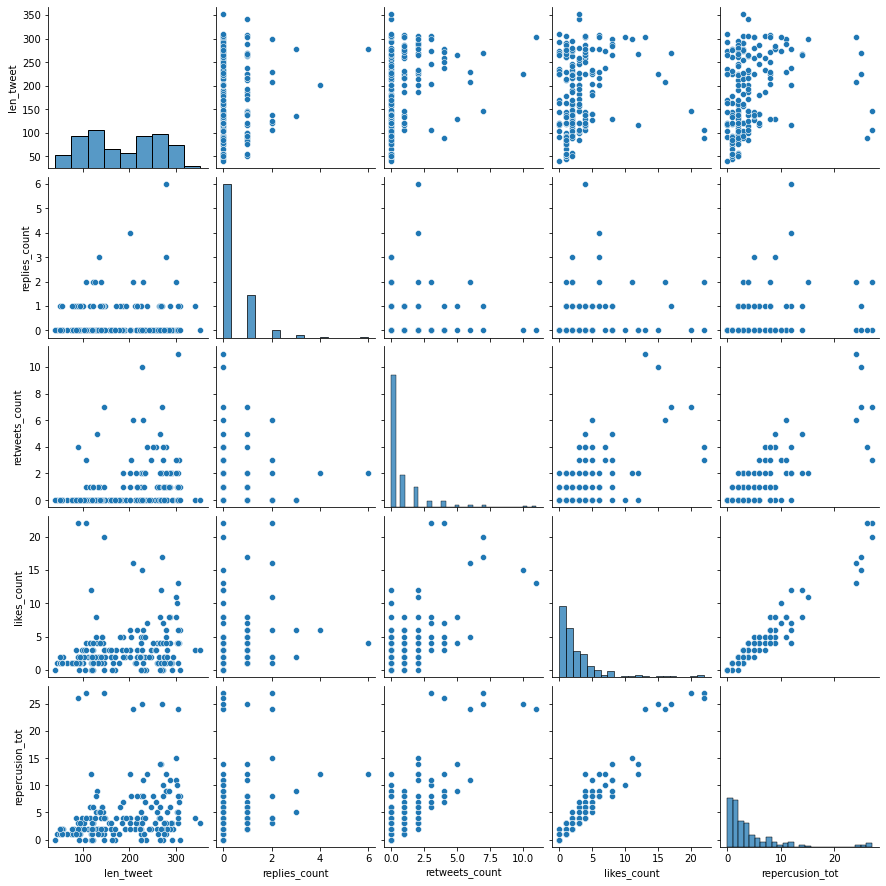

In [14]:
import seaborn as sns

# OBTENEMOS UNA TABLA DE LAS RELACIONES DE LAS METRICAS ENTRE SI.

metricas = tweets[['len_tweet','replies_count', 'retweets_count', 'likes_count', 'repercusion_tot']]

sns.pairplot(metricas)

In [ ]:
## Podemos observar que hay una correlación positiva entre los likes y la repercusión total con la longitud del tweet,
## a pesar de haber ciertos outliers. También vemos que los likes son los que mas peso tienen en relación a la repercusión total.
## Igualmente se observa una correlación positiva entre los likes y los retweets.

<font face = "Courier New" size = 4 > 6.¿Has sacado alguna conclusión extra en tu análisis? </font>

In [ ]:
## A DESTACAR LA ALTA ACTIVIDAD EN EL MES DE JUNIO Y SEPTIEMBRE. CONOCIENDO EL CASO DE USO, ENTENDEMOS QUE TIENE RELACIÓN CON LOS COMIENZOS
## DE CURSO TANTO POR LA ACTIVIDAD DEL USUARIO PRINCIPAL COMO DE LOS QUE LO MENCIONAN.

